In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# Load the dataset
df = pd.read_csv("D:\\MainFlow\\Task2\\sample_sales_data.csv")

In [49]:
df.head(5)

,Product,Region,Revenue,Profit,Discount,Category,Date
0,C,East,2892,1741,0.117355,Electronics,2023-01-01
1,A,South,7894,107,0.415137,Furniture,2023-01-02
2,C,East,6405,500,0.106178,Clothing,2023-01-03
3,C,North,8996,830,0.477961,Furniture,2023-01-04
4,C,West,3910,2918,0.095972,Furniture,2023-01-05


In [50]:
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   100 non-null    object 
 1   Region    100 non-null    object 
 2   Revenue   100 non-null    int64  
 3   Profit    100 non-null    int64  
 4   Discount  100 non-null    float64
 5   Category  100 non-null    object 
 6   Date      100 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ KB
  Product Region  Revenue  Profit  Discount     Category        Date
0       C   East     2892    1741  0.117355  Electronics  2023-01-01
1       A  South     7894     107  0.415137    Furniture  2023-01-02
2       C   East     6405     500  0.106178     Clothing  2023-01-03
3       C  North     8996     830  0.477961    Furniture  2023-01-04
4       C   West     3910    2918  0.095972    Furniture  2023-01-05


In [51]:
# Remove duplicates
df_cleaned = df.drop_duplicates()

In [52]:
# Fill missing values using median
df_cleaned["Revenue"].fillna(df_cleaned["Revenue"].median(), inplace=True)
df_cleaned["Profit"].fillna(df_cleaned["Profit"].median(), inplace=True)
df_cleaned["Discount"].fillna(df_cleaned["Discount"].median(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_8516\299352052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Revenue"].fillna(df_cleaned["Revenue"].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_8516\299352052.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [53]:
# Convert 'Date' column to datetime format
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])

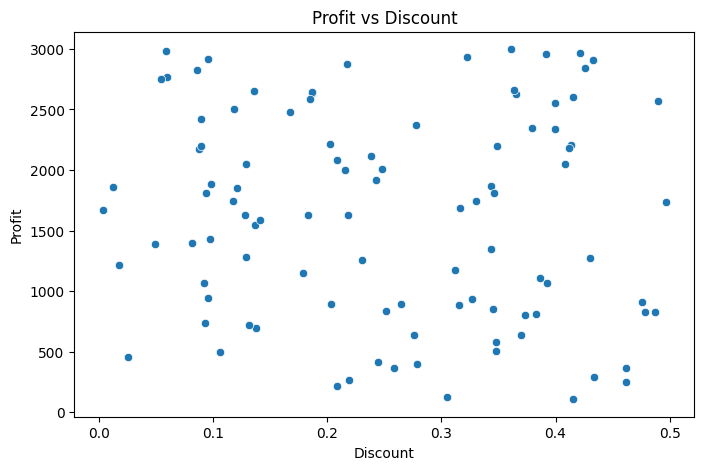

In [54]:
# Scatter plot for Profit vs Discount
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Discount", y="Profit", data=df_cleaned)
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


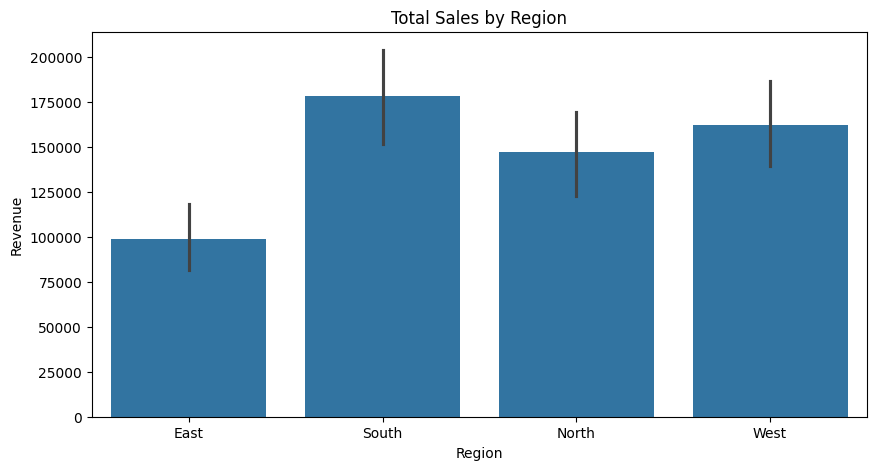

In [56]:
# Sales distribution by Region and Category
plt.figure(figsize=(10, 5))
sns.barplot(x="Region", y="Revenue", data=df_cleaned, estimator=np.sum)
plt.title("Total Sales by Region")
plt.show()

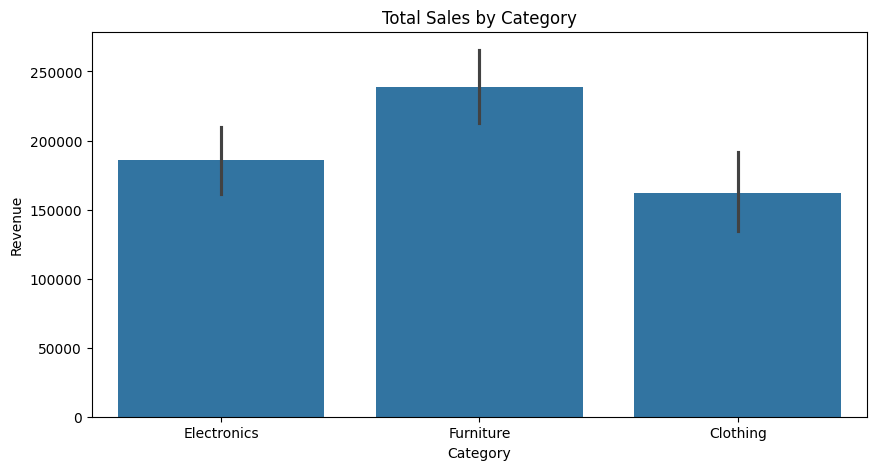

In [57]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Category", y="Revenue", data=df_cleaned, estimator=np.sum)
plt.title("Total Sales by Category")
plt.show()

In [58]:
# Predictive Modeling
features = ["Profit", "Discount"]
X = df_cleaned[features]
y = df_cleaned["Revenue"]

In [59]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [61]:
# Make predictions
y_pred = model.predict(X_test)

In [62]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 8992053.469890099
R-squared Score: -0.3656649084545689
